# SVR (Destek Vektör Regresyonu)

# Model

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
# Bu kısımda doğrusal SVR ile uğraştığımızdan toplam 2 değişkene düşürüyoruz, salary ve hits
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.svm import SVR

In [5]:
svr_model = SVR("linear").fit(X_train, y_train)

In [6]:
y_pred = svr_model.predict(X_train) # bağımlı değişkenin train setiyle tahmin edilen değerleri

In [7]:
t1_svr = y_pred[0]
# aşağıda karşılaştırma için kullanıcaz

In [8]:
#SVR'ın model denklemi
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122206 x


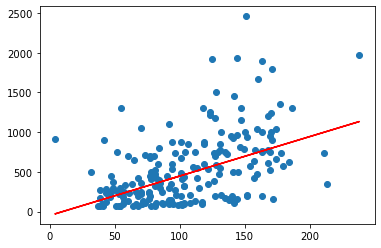

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r");

In [10]:
# bir de linear regresyonu aynı durum için inceleyelim
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [11]:
t1_lm = lm_pred[0]

In [12]:
# şimdi linear model ile svr'nin ilk tahminlerini karşılaştıralım
t1_lm, t1_svr

(461.87941284749803, 403.5280487804888)

In [13]:
# bu farklılık neden gerçekleşti? hadi üst üstet model denklemlerini grafikte inceleyelim

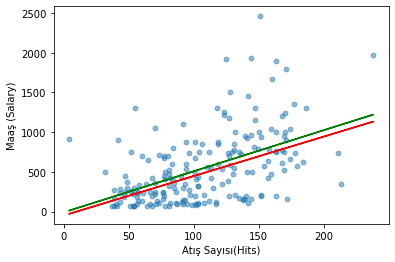

In [14]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)");

In [15]:
# Neden LR modeli daha yukarda ve SVR modeli daha aşağıda ?

##### Bunun sebebi linear model en üstteki aykırı gözlemlerden etkilenerek EKK düzenlemesi için yukarı çekilmektedir.

#### SVR için de bu geçerlidir ama SVR'ın aykırılardan etkilenme miktarı linear modele göre daha azdır.

# Tahmin

In [16]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) # tahmin denklemimiz

y = -48.69756097561513 + 4.969512195122206 x


In [17]:
svr_model.predict([[91]])

array([403.52804878])

In [18]:
y_pred = svr_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred)) # tune edilmemiş test hatası

459.0187960365147

# Model Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

Burada tune etmemiz gereken parametre C parametrsei (Karmaşıklık parametresi)

In [21]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}

In [22]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

Yukarda oluşturduğumuz svr_cv_model nesnesini direkt model nesnesi olarak kullanıp bu modelle tahmin ürettiğinizde de bu nesne de tune edilmiş parametreyi parametre değeri olarak kabul edip ona göre işlem yapıyor, yani aşağıda yaptığımız 

"svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)"

kısmı olmasa da doğru çalışabilir, yanlış bir kullanım değildir. Tahmin işlemi direkt oradan da yapılabilir.

In [23]:
svr_cv_model.best_params_

{'C': 0.1}

In [24]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [25]:
# best_params_'a göre final modeli oluşturmak

In [26]:
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [27]:
y_pred = svr_tuned.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred)) # tuned test hatamız

458.198966781116

# ------------------------------------------------------------

Bu kısım bu bölüm için gerekli değil AMA yapmak iyi çünkü sadece hits kullanarak hesaplanan ile bütün değişkenler kullanılarak hesaplanan hataların farkını görüyoruz

In [29]:
# şimdi SVR modelimizi bütün bağımsız değişkenleri kullanarak çalıştırıp test hatasına bakalım

In [30]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
svr_params = {"C": np.arange(0.3, 0.5, 0.1)} # işlem hızlansın diye daha az parametre denetiyorum
# normalde mantıklı değil şuan cevabı bildiğimden böyle yaptım

In [32]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

##### yukarıda çalıştırdığımız kodda bilgisayar hesaplamaları yaparken işlemcinin max %20'sini kullanır
##### yüksek paramtetre sayılarında bu durum hesap süresini çok uzatacağından işlemci kullanımını arttırmayı göreceğiz

In [33]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [34]:
svr_tuned_multiple = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [35]:
y_pred = svr_tuned_multiple.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred)) # tuned test hatamız ama çoklu değişkenli modelde

367.538528365296

#### Sadece Hits kullanıdğımızda aldığımız hata : 458
#### Tune edilmiş KNN : 413
#### SVR : 367
#### Burada görüyoruz ki Hitters veri seti için Doğrusal SVR en düşük hataya sahip oldu